In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from jc_model import *
%matplotlib inline

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# Meninjau Pengaruh Kuat Interaksi Atom-Medan
Pada percobaan ini digunakan parameter sebagai berikut:
* $\hbar=1$
* $\omega_{0}=\omega=2\pi$
* $\lambda=(0 sampai 5.0)\omega_{0}\hbar$
* $\overline{n}=15$

> **Keterangan:**
> * $\omega_{0}$ merupakan ungkapan frekuensi transisi atom
> * $\omega$ merupakan ungkapan frekuensi medan
> * $\lambda$ merupakan ungkapan kuat interaksi atom-medan
> * $\overline{n}$ merupakan ungkapan jumlah rata-rata foton

In [2]:
wa = 2*np.pi     #frekuensi atom
wc = wa          #frekuensi medan
N = 15           #jumlah rata-rata foton
use_rwa = False
g_list = np.linspace(0, 3.5, 301)*2*np.pi # Kuat interaksi

#oprator
a = tensor(destroy(N), qeye(2))  #operator a
sm = tensor(qeye(N), destroy(2)) #operator sigma-positif

## Ungkapan Energi sebagai Fungsi Interaksi $\lambda$


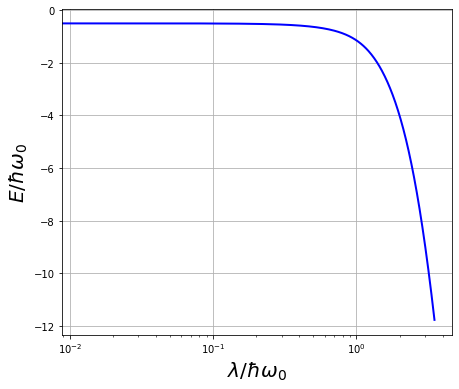

In [3]:
psi_list = []
E_list = []

for g in g_list:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    
    # Menghitung kedaan & energi dasar sistem atom-medan
    gnd_energy, gnd_state = H.groundstate() 
    psi_list.append(gnd_state)
    E_list.append(gnd_energy/(2*np.pi))
    

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(7,6))
axes.semilogx(g_list/wa, E_list, 'b', linewidth=2)
axes.set_ylabel(r"$E/\hbar\omega_{0}$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_{0}$", fontsize=20)
axes.grid()

In [4]:
help(H.groundstate)

Help on method groundstate in module qutip.qobj:

groundstate(sparse=False, tol=0, maxiter=100000, safe=True) method of qutip.qobj.Qobj instance
    Ground state Eigenvalue and Eigenvector.
    
    Defined for quantum operators or superoperators only.
    
    Parameters
    ----------
    sparse : bool
        Use sparse Eigensolver
    tol : float
        Tolerance used by sparse Eigensolver (0 = machine precision).
        The sparse solver may not converge if the tolerance is set too low.
    maxiter : int
        Maximum number of iterations performed by sparse solver (if used).
    safe : bool (default=True)
        Check for degenerate ground state
    
    Returns
    -------
    eigval : float
        Eigenvalue for the ground state of quantum operator.
    eigvec : :class:`qutip.Qobj`
        Eigenket for the ground state of quantum operator.
    
    Notes
    -----
    The sparse eigensolver is much slower than the dense version.
    Use sparse only if memory requirements 

In [5]:
help(wigner)

Help on function wigner in module qutip.wigner:

wigner(psi, xvec, yvec, method='clenshaw', g=1.4142135623730951, sparse=False, parfor=False)
    Wigner function for a state vector or density matrix at points
    `xvec + i * yvec`.
    
    Parameters
    ----------
    
    state : qobj
        A state vector or density matrix.
    
    xvec : array_like
        x-coordinates at which to calculate the Wigner function.
    
    yvec : array_like
        y-coordinates at which to calculate the Wigner function.  Does not
        apply to the 'fft' method.
    
    g : float
        Scaling factor for `a = 0.5 * g * (x + iy)`, default `g = sqrt(2)`.
        The value of `g` is related to the value of `hbar` in the commutation
        relation `[x, y] = i * hbar` via `hbar=2/g^2` giving the default
        value `hbar=1`.
    
    method : string {'clenshaw', 'iterative', 'laguerre', 'fft'}
        Select method 'clenshaw' 'iterative', 'laguerre', or 'fft', where 'clenshaw'
        and 'it

In [6]:
help(steadystate)

Help on function steadystate in module qutip.steadystate:

steadystate(A, c_op_list=[], method='direct', solver=None, **kwargs)
    Calculates the steady state for quantum evolution subject to the
    supplied Hamiltonian or Liouvillian operator and (if given a Hamiltonian) a
    list of collapse operators.
    
    If the user passes a Hamiltonian then it, along with the list of collapse
    operators, will be converted into a Liouvillian operator in Lindblad form.
    
    Parameters
    ----------
    A : qobj
        A Hamiltonian or Liouvillian operator.
    
    c_op_list : list
        A list of collapse operators.
    
    solver : str {None, 'scipy', 'mkl'}
        Selects the sparse solver to use.  Default is auto-select
        based on the availability of the MKL library.
    
    method : str {'direct', 'eigen', 'iterative-gmres',
                  'iterative-lgmres', 'iterative-bicgstab', 'svd', 'power',
                  'power-gmres', 'power-lgmres', 'power-bicgstab'}
 

In [7]:
help(mesolve)

Help on function mesolve in module qutip.mesolve:

mesolve(H, rho0, tlist, c_ops=None, e_ops=None, args=None, options=None, progress_bar=None, _safe_mode=True)
    Master equation evolution of a density matrix for a given Hamiltonian and
    set of collapse operators, or a Liouvillian.
    
    Evolve the state vector or density matrix (`rho0`) using a given
    Hamiltonian (`H`) and an [optional] set of collapse operators
    (`c_ops`), by integrating the set of ordinary differential equations
    that define the system. In the absence of collapse operators the system is
    evolved according to the unitary evolution of the Hamiltonian.
    
    The output is either the state vector at arbitrary points in time
    (`tlist`), or the expectation values of the supplied operators
    (`e_ops`). If e_ops is a callback function, it is invoked for each
    time in `tlist` with time and the state as arguments, and the function
    does not use any return values.
    
    If either `H` or the 

## Ungkapan Entropi dengan Memvariasikan Kuat Interaksi  𝜆

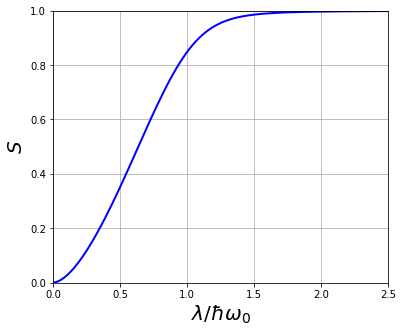

In [8]:
entropy = np.zeros(shape(g_list))

for idx, psi in enumerate(psi_list):
    # Menghitung entropi
    entropy[idx]   = Entropy(psi)

fig, axes = plt.subplots(1, 1, figsize=(6,5))
axes.plot(g_list/(2*np.pi), entropy, 'b', linewidth=2)
axes.set_ylabel(r"$S$", fontsize=20)
axes.set_xlabel(r"$\lambda/\hbar\omega_0$", fontsize=20)
axes.set(xlim=(0, 2.5), ylim=(0, 1))
axes.grid()

## Ungkapan Fungsi Wigner dengan Memvariasikan Kuat Interaksi $\lambda$

In [9]:
# Nilai kuat interaksi yang akan di gunakan untuk menghitung fungsi Wigner 
g_plot = np.array([0.1, 1.0, 1.2, 2.0])*wa
psi_plot = []
for g in g_plot:
    # Hamiltonian total
    H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
    
    # Menghitung kedaan & energi dasar sistem atom-medan
    gnd_energy, gnd_state = H.groundstate() 
    psi_plot.append(gnd_state)

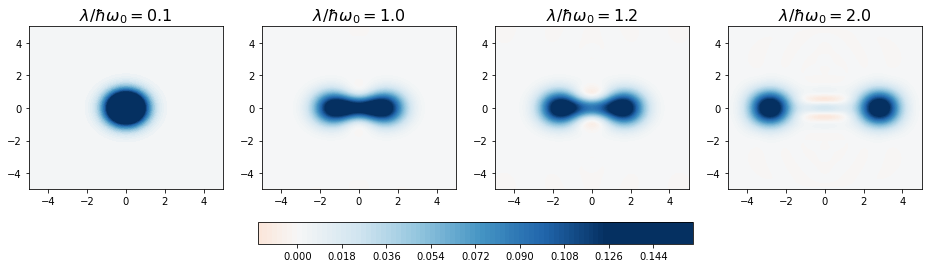

In [10]:
# Koordinat x dan y
xvec = np.linspace(-5,5,500)

# Persiapan plot
fig, axes = plt.subplots(1,len(g_plot), sharex=True, figsize=(16,4))

for idx, psi in enumerate(psi_plot):
    W = Wigner(psi=psi, xvec=xvec, yvec=xvec)
    
    g_idx = g_plot[idx]/(wa)
    
    # Plot fungsi Wigner
    nrm = mpl.colors.Normalize(-.125,.125)
    cs=axes[idx].contourf(xvec, xvec, W, 100, cmap='RdBu', norm=nrm)
    axes[idx].set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % g_idx, fontsize=16)
cbar = fig.colorbar(cs, ax=axes, orientation='horizontal', fraction=.1)
plt.savefig('Plot_wigner_kuat interaksi.pdf')

# Ungkapan Probabilitas Okupasi
* $\lambda=0.1\hbar\omega_{0}$

In [11]:
# Parameter
g = 0.05*wa
tlist = np.linspace(0,30,301)
psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
me_result = mesolve(H, psi_0, tlist, [], [])
P_e = me_result.expect[0]

IndexError: list index out of range

NameError: name 'P_e' is not defined

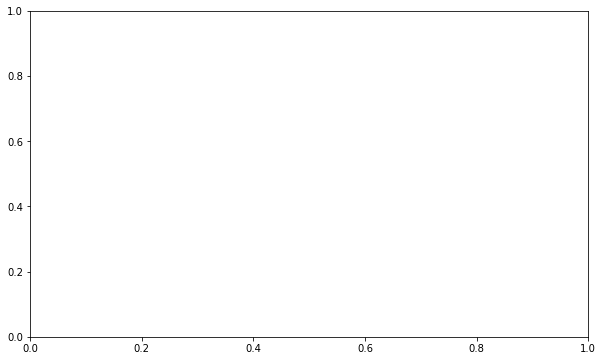

In [12]:
# Plot probabilitas okupasi
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_e,'b-')
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Probabilitas Okupasi', fontsize=20)
plt.show()

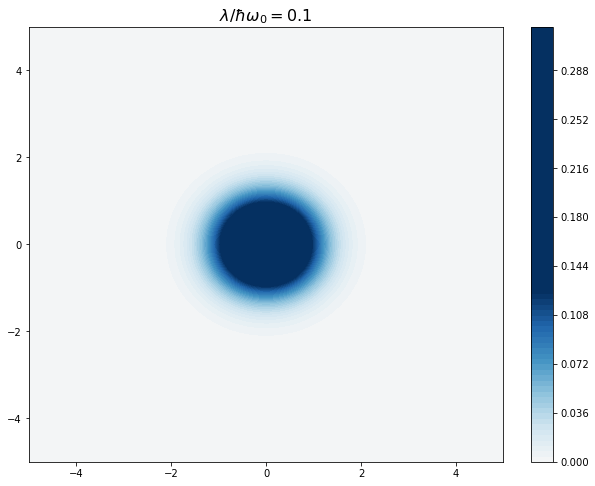

In [13]:
# Fungsi Wigner
gnd_energy, gnd_state = H.groundstate() 
W = Wigner(psi=gnd_state, xvec=xvec, yvec=xvec)

# Plot fungsi Wigner
fig, axes = plt.subplots(1, 1, figsize=(10,8))
cs = axes.contourf(xvec, xvec, W, 100, cmap='RdBu', norm=nrm)
axes.set_title(r"$\lambda/\hbar\omega_0 = %.1f$" % (g/wa), fontsize=16)
fig.colorbar(cs, fraction=.1)

* $\lambda=1.2\hbar\omega_{0}$

In [14]:
# Parameter
g = 1.2*wa
tlist = np.linspace(0,30,301)
psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm])
P_e = me_result.expect[0]

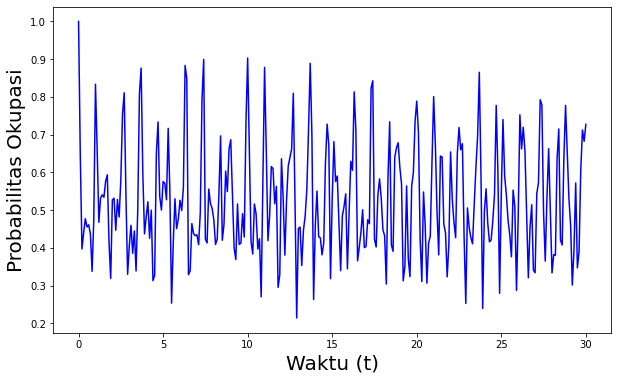

In [15]:
# plot probabilitas okupasi
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_e,'b-')
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Probabilitas Okupasi', fontsize=20)
plt.show()

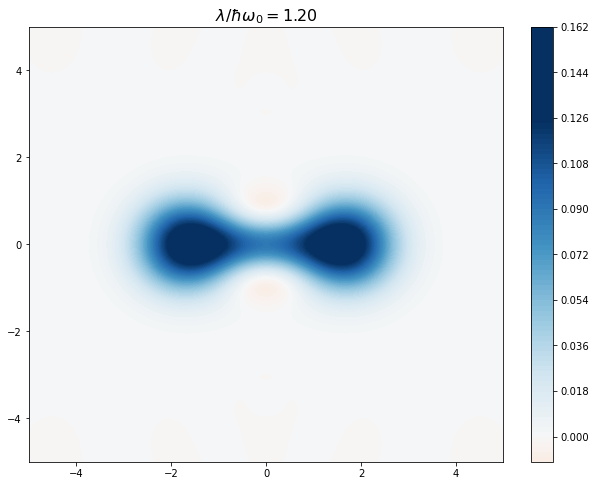

In [16]:
# Fungsi Wigner
gnd_energy, gnd_state = H.groundstate() 
W = Wigner(psi=gnd_state, xvec=xvec, yvec=xvec)

# Plot fungsi Wigner
fig, axes = plt.subplots(1, 1, figsize=(10,8))
cs = axes.contourf(xvec, xvec, W, 100, cmap='RdBu', norm=nrm)
axes.set_title(r"$\lambda/\hbar\omega_0 = %.2f$" % (g/wa), fontsize=16)
fig.colorbar(cs, fraction=.1)

* $\lambda=2.0\hbar\omega_{0}$

In [17]:
# Parameter
g = 3.3*wa
tlist = np.linspace(0,30,301)
psi_0 = tensor(basis(N,0), basis(2,1)) # keadaan eksitasi

H = Hamiltonian(omega_a=wa, omega_m=wc, g=g, n=N, a=a, sm=sm, rwa=use_rwa)
me_result = mesolve(H, psi_0, tlist, [], [sm.dag()*sm])
P_e = me_result.expect[0]

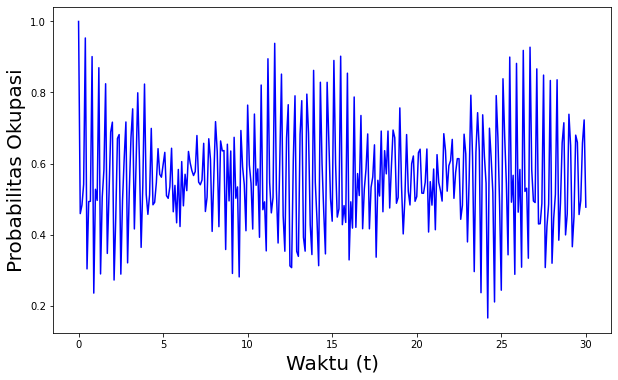

In [18]:
# plot probabilitas okupasi
fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes.plot(tlist, P_e,'b-')
axes.set_xlabel('Waktu (t)', fontsize=20)
axes.set_ylabel('Probabilitas Okupasi', fontsize=20)
plt.show()

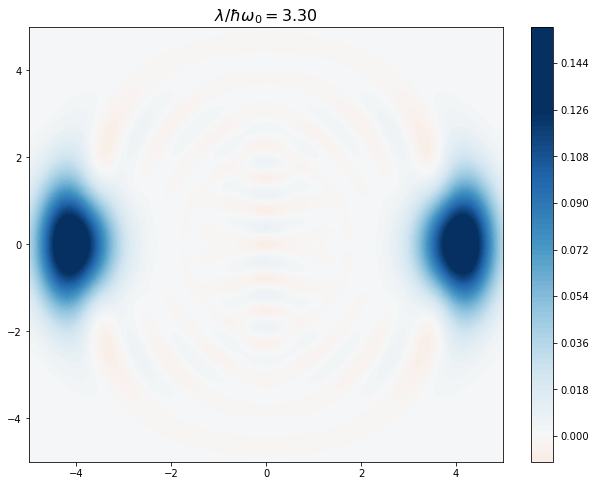

In [19]:
# Fungsi Wigner
gnd_energy, gnd_state = H.groundstate() 
W = Wigner(psi=gnd_state, xvec=xvec, yvec=xvec)

# Plot fungsi Wigner
fig, axes = plt.subplots(1, 1, figsize=(10,8))
cs = axes.contourf(xvec, xvec, W, 100, cmap='RdBu', norm=nrm)
axes.set_title(r"$\lambda/\hbar\omega_0 = %.2f$" % (g/wa), fontsize=16)
fig.colorbar(cs, fraction=.1)